<a href="https://colab.research.google.com/github/DmitriiDenisov/research-DT-Logreg/blob/master/LogRegr_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [111]:
np.set_printoptions(suppress=True)

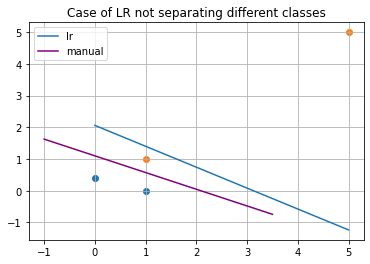

In [79]:
np.random.seed(7)
n = 3

X = np.array([[ 1 , 0],
       [ 0. ,  0.4],
       [ 5.        ,  5.        ],
       [ 1.        ,  1.        ]])

y = np.array(2*[0]+2*[1])

lr = LogisticRegression(C=1)
#lr = LinearSVC(C=1e1)
lr.fit(X, y)
b = lr.intercept_[0]
m0 = lr.coef_[0][0]
m1 = lr.coef_[0][1]

#Plot
x_vals = np.linspace(X.min(),X.max(),100)
y_vals = -(m0/m1)*x_vals - b/m1

plt.scatter(X[y==0][:,0], X[y==0][:,1])
plt.scatter(X[y==1][:,0], X[y==1][:,1])
plt.plot(x_vals, y_vals, label = 'lr')
m1 = -0.527
b1 = 1.1
t = np.linspace(-1, 3.5, 50)
plt.plot(t, m1*t+b1, color='purple', label='manual')

plt.title('Case of LR not separating different classes')
plt.grid(True)
plt.legend()
plt.show()

In [80]:
print(lr.intercept_, lr.coef_)

[-1.19314791] [[0.38186445 0.57885816]]


In [107]:
# Сначала покажем, что мы верно записываем формулу для predict_proba + формулу для loss
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))
assert (lr.predict_proba(X)[:, 1] == y_pred_form).all()
assert log_loss(y, y_pred_form) == np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

In [108]:
# Теперь считаем Loss для найденных параметров Лог Регр
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))
print(y_pred_form)
np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

[0.30761707 0.27655703 0.97367261 0.44215385]


0.3835318015270139

In [109]:
# Теперь считаем Loss для тех же параметров, умноженных на k
k=2
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, k * lr.coef_.T) + k * lr.intercept_).flatten() ))
print(y_pred_form)
np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

[0.16485117 0.12750412 0.99926941 0.38583576]


0.31740425174104714